In [28]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from math import sqrt
from utils import get_test_table
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
X_train, X_test, y_train, y_test = get_test_table()
X_train['date'] = X_train['date'].astype(np.int64)
X_test['date'] = X_test['date'].astype(np.int64)



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['auto', 'svd', 'lsqr'],
    'max_iter': [1000, 5000, 8000],
    'tol': [1e-3, 1e-4]
}

ridge = Ridge()

grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

grid_search.fit(X_train_scaled, y_train)

best_parameters = grid_search.best_params_
print(f'Best Parameters: {best_parameters}')

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE of the best model: {rmse}')

Best Parameters: {'alpha': 0.1, 'max_iter': 1000, 'solver': 'svd', 'tol': 0.001}
RMSE of the best model: 5.202864691555807


In [31]:
best_alpha = best_parameters['alpha']
best_solver = best_parameters['solver']
best_max_iter = best_parameters['max_iter']
best_tol = best_parameters['tol']

# The model with best params
ridge_best = Ridge(alpha=best_alpha, solver=best_solver, max_iter=best_max_iter, tol=best_tol)

ridge_best.fit(X_train_scaled, y_train)

Ridge(alpha=0.1, max_iter=1000, solver='svd', tol=0.001)

In [32]:
coefficients = ridge_best.coef_
feature_names = X_train.columns

# Pair the feature names with the coefficients
feature_importance = list(zip(feature_names, coefficients))

# Sort the features by the absolute value of their coefficients
sorted_feature_importance = sorted(feature_importance, key=lambda x: abs(x[1]), reverse=True)

# Display the sorted feature importance
for feature, coef in sorted_feature_importance:
    print(f"Feature: {feature}, Coefficient: {abs(coef)}")

Feature: 2m_temp_mean, Coefficient: 15.86010773342766
Feature: 2m_dp_temp_mean, Coefficient: 9.404441658668805
Feature: 2m_temp_max, Coefficient: 7.015341785303006
Feature: surf_net_solar_rad_mean, Coefficient: 3.6353168681616714
Feature: total_et, Coefficient: 3.5141279959448584
Feature: 2m_dp_temp_min, Coefficient: 3.2107702539019796
Feature: 10m_wind_u, Coefficient: 2.7202152655016323
Feature: 2m_dp_temp_max, Coefficient: 2.3198304583993252
Feature: 2m_temp_min, Coefficient: 1.9392919580311643
Feature: swe, Coefficient: 1.125424656076162
Feature: surf_press, Coefficient: 1.1017543345447953
Feature: fcst_alb, Coefficient: 1.0638968411467529
Feature: surf_net_therm_rad_max, Coefficient: 1.053671685180296
Feature: surf_net_solar_rad_max, Coefficient: 0.9264721603987612
Feature: surf_net_therm_rad_mean, Coefficient: 0.7940479015113033
Feature: lai_high_veg, Coefficient: 0.6808056307007743
Feature: lai_low_veg, Coefficient: 0.6757315706467754
Feature: volsw_4, Coefficient: 0.363600834206

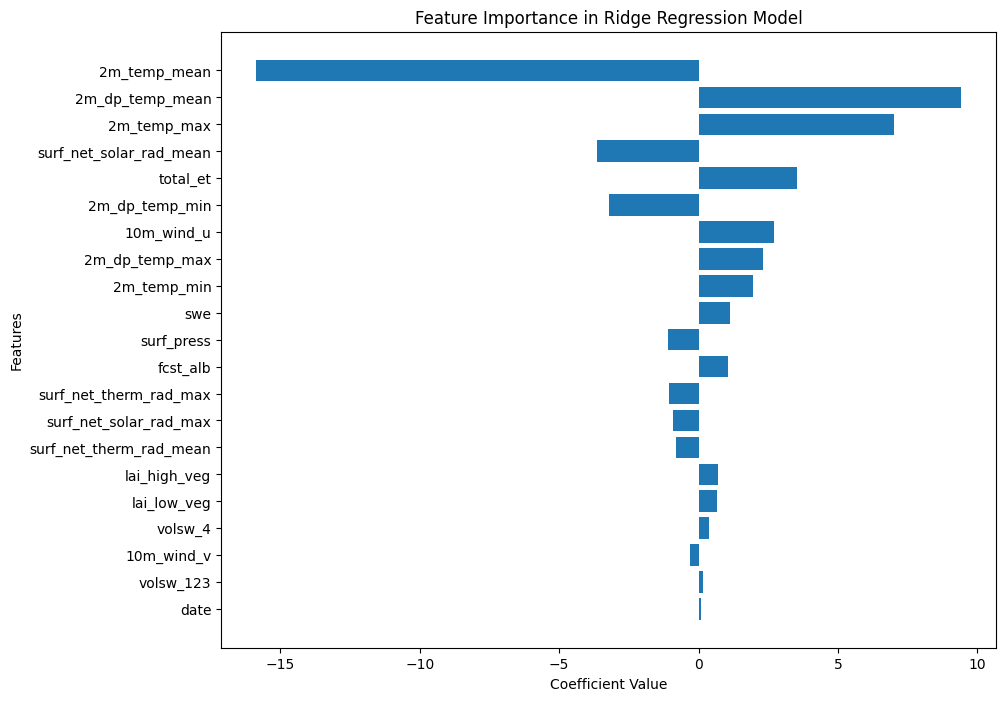

In [43]:
features, coefficients = zip(*sorted_feature_importance)
plt.figure(figsize=(10, 8))
plt.barh(features, coefficients)  # Horizontal bar plot
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance in Ridge Regression Model')
plt.gca().invert_yaxis()
plt.show()